Select dataset D1,D2,D3D3
Let us see our chosen dataset
    Sr    X1    X2 Class
0    1  6.00  7.00    C2
1    2  4.20  1.40    C1
2    3  4.20  6.00    C2
3    4  3.50  2.00    C1
4    5  6.00  8.00    C2
5    6  4.50  1.90    C1
6    7  2.10  2.74    C1
7    8  7.00  3.00    C2
8    9  2.50  2.30    C1
9   10  4.10  6.50    C2
10  11  5.30  7.40    C2
11  12  4.60  6.10    C2
12  13  5.60  6.90    C2
13  14  5.00  7.20    C2
14  15  5.50  4.70    C2
15  16  3.75  2.50    C1
16  17  4.30  2.70    C1
17  18  3.20  4.60    C1
18  19  3.50  3.80    C1
19  20  4.00  7.00    C2
20  21  6.00  6.00    C2
21  22  6.00  4.00    C2
22  23  5.00  5.00    C2
23  24  6.20  3.80    C2
24  25  5.80  5.70    C2
25  26  2.00  2.00    C1
26  27  2.50  3.00    C1
27  28  3.70  2.70    C1
28  29  3.80  2.70    C1
29  30  6.30  5.00    C2
30  31  7.10  5.40    C2
31  32  3.00  4.00    C1
32  33  2.90  1.70    C1
33  34  3.50  3.50    C1
34  35  2.80  3.40    C1
35  36  4.00  2.00    C1
36  37  4.10  3.00 

Text(0.5, 0, 'X1')

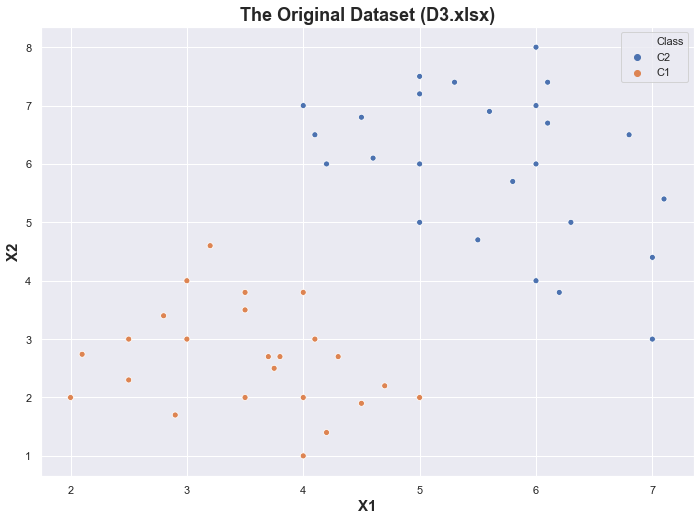

In [27]:
#import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

#take input from user
i=input("Select dataset D1,D2,D3")
name=i
assert i in ['D1','D2','D3']

#show the dataset
print("Let us see our chosen dataset")
time.sleep(0.5)
dataset=pd.read_excel(i+'.xlsx')
print(dataset)
time.sleep(1)
#edit the print statement below*
print("The dataset is a set of "+str(len(dataset))+" points in 2D cordinate system")
#show the graph of the dataset
time.sleep(1)
print("Now let us visually represnt and analyse the data")
print("Here is the data is visual form")
sns.set(rc={'figure.figsize':(11.7,8.27)})
b=sns.scatterplot(data=dataset,x="X1",y="X2",hue="Class")
b.set_title("The Original Dataset ("+name+".xlsx)",fontsize=18,fontweight="bold")
b.set_ylabel("X2",fontweight="bold",fontsize=15)
b.set_xlabel("X1",fontweight="bold",fontsize=15)

In [28]:
#define class datapoint
class Datapoint:
    def __init__(self,x1,x2,Class):
        self.x1=x1
        self.x2=x2
        self.Class=Class

In [29]:
#classification check in original basis
data=[]
for i in dataset.index:
    obj=Datapoint(dataset.iloc[i]["X1"],dataset.iloc[i]["X2"],dataset.iloc[i]["Class"])
    data.append(obj)

In [40]:
#classify check along projection on x1 in original basis
data.sort(key=lambda a:a.x1)
first_class=None
along_x1_original=False
c1_count=0
c2_count=0
for i in data:
    if i.Class=="C1":
        c1_count+=1
    if i.Class=="C2":
        c2_count+=1
(c1_count,c2_count)
stack=[]
for i in data:
    if len(stack)==0:
        stack.append(i)
        first_class=i.Class
    elif stack[-1].Class!=i.Class:
        break
    elif stack[-1].Class==i.Class:
        stack.append(i)
fcount=None
if first_class=="C1":
    fcount=c1_count
else:
    fcount=c2_count
if fcount==len(stack):
    print("The data can be classified when projected along x1 by a separator along x2")
    along_x1_original=True
    b=sns.scatterplot(data=dataset,x="X1",y="X2",hue="Class")
    b.set_title("Classification in Original Basis ("+name+".xlsx)",fontsize=18,fontweight="bold")
    b.set_ylabel("X2",fontweight="bold",fontsize=15)
    b.set_xlabel("X1",fontweight="bold",fontsize=15)
    x1_f=data[len(stack)].x1
    x1_b=data[len(stack)-1].x1
    x1_p=(x1_f+x1_b)/2
    plt.axvline(x=x1_p,linewidth=1,color='purple')
    plt.plot([x1_p],[0],'ro')
    labels="("+str(x1_p)+",0)"
    plt.text(x1_p,0,labels)
else:
    print("The data cannot be classified when projected along x1 by a separator along x2")

The data cannot be classified when projected along x1 by a separator along x2


In [31]:
#classify check along projection on x2 in original basis
data.sort(key=lambda a:a.x2)
first_class=None
along_x2_original=False
c1_count=0
c2_count=0
for i in data:
    if i.Class=="C1":
        c1_count+=1
    if i.Class=="C2":
        c2_count+=1
print(c1_count)
stack=[]
for i in data:
    if len(stack)==0:
        stack.append(i)
        first_class=i.Class
    elif stack[-1].Class!=i.Class:
        break
    elif stack[-1].Class==i.Class:
        stack.append(i)
fcount=None
if first_class=="C1":
    fcount=c1_count
else:
    fcount=c2_count
if fcount==len(stack):
    print("The data can be classified when projected along x2 by a separator along x1")
    along_x2_original=True
    b=sns.scatterplot(data=dataset,x="X1",y="X2",hue="Class")
    b.set_title("Classification in Original Basis ("+name+".xlsx)",fontsize=18,fontweight="bold")
    b.set_ylabel("X2",fontweight="bold",fontsize=15)
    b.set_xlabel("X1",fontweight="bold",fontsize=15)
    y1_f=data[len(stack)].x2
    y1_b=data[len(stack)-1].x2
    y1_p=(y1_f+y1_b)/2
    plt.axhline(y=y1_p,linewidth=1,color='purple')
    plt.plot([0],[y1_p],'ro')
    labels="(0,"+str(y1_p)+")"
    plt.text(0,y1_p,labels)
else:
    print("The data cannot be classified when projected along x2 by a separator along x1")

24
The data cannot be classified when projected along x2 by a separator along x1


In [35]:
#find eigen vectors
data_matrix=[[],[]]
for i in dataset.index:
    data_matrix[0].append(dataset.iloc[i]["X1"])
    data_matrix[1].append(dataset.iloc[i]["X2"])
cov_mat=np.cov(data_matrix)
eig_vals,eig_vects=np.linalg.eig(cov_mat)
print(eig_vects,eig_vals)
idx = eig_vals.argsort()[::-1]   
eig_vals = eig_vals[idx]
eig_vects = eig_vects[:,idx]
print("The eigen vectors are:",eig_vects)
print("The eigen values are:",eig_vals)
A=np.transpose(eig_vects)
print("The transformation matrix is:")
print(A)

[[-0.8972046  -0.44161512]
 [ 0.44161512 -0.8972046 ]] [1.12762034 4.76265551]
The eigen vectors are: [[-0.44161512 -0.8972046 ]
 [-0.8972046   0.44161512]]
The eigen values are: [4.76265551 1.12762034]
The transformation matrix is:
[[-0.44161512 -0.8972046 ]
 [-0.8972046   0.44161512]]


In [37]:
X=data_matrix.copy()
Y=np.matmul(A,X)
print("The transformed data matrix is:")
print(Y)

The transformed data matrix is:
[[-8.93012288 -3.11086992 -7.23801107 -3.3400621  -9.82732747 -3.69195676
  -3.38573234 -5.7829196  -3.16760836 -7.64245186 -8.97987413 -7.50437758
  -8.66375637 -8.66794868 -6.64574475 -3.89906818 -4.32139741 -5.54030952
  -4.95503038 -8.04689264 -8.03291828 -6.23850909 -6.69409857 -6.14739119
  -7.67543388 -2.67763943 -3.79565158 -4.05642834 -4.10058985 -7.26819822
  -7.98037215 -4.91366374 -2.80593165 -4.685869   -4.28701796 -3.56086966
  -4.50223577 -8.83481267 -8.08825928 -5.17583793 -9.33316623 -8.70512301
  -8.93711006 -7.59130316 -4.01645914 -7.03900604 -2.66366506 -4.04944116
  -4.00248478]
 [-2.29192177 -3.14999815 -1.11856861 -2.25698586 -1.85030665 -3.19835197
  -0.67410424 -4.95558683 -1.22729673 -0.80804059 -1.4872325  -1.43328894
  -1.97720144 -1.30639415 -2.85903424 -2.26047945 -2.66561895 -0.83962518
  -1.46207865 -0.49751257 -2.73353689 -3.61676712 -2.2779474  -3.88453106
  -2.6865805  -0.91117896 -0.91816614 -2.1272962  -2.21701666 -3.

In [39]:
mod_dataset=dataset.copy()
mod_dataset["e1"]=Y[0]
mod_dataset['e2']=Y[1]
mod_dataset

,Sr,X1,X2,Class,e1,e2
0,1,6.00,7.00,C2,-8.930123,-2.291922
1,2,4.20,1.40,C1,-3.110870,-3.149998
2,3,4.20,6.00,C2,-7.238011,-1.118569
3,4,3.50,2.00,C1,-3.340062,-2.256986
4,5,6.00,8.00,C2,-9.827327,-1.850307
5,6,4.50,1.90,C1,-3.691957,-3.198352
6,7,2.10,2.74,C1,-3.385732,-0.674104
7,8,7.00,3.00,C2,-5.782920,-4.955587
8,9,2.50,2.30,C1,-3.167608,-1.227297
9,10,4.10,6.50,C2,-7.642452,-0.808041


In [41]:
class ModDataPoint:
    def __init__(self,e1,e2,Class):
        self.e1=e1
        self.e2=e2
        self.Class=Class

In [45]:
data_mod=[]
for i in mod_dataset.index:
    data_mod.append(ModDataPoint(mod_dataset.iloc[i]["e1"],mod_dataset.iloc[i]["e2"],mod_dataset.iloc[i]["Class"]))

Text(0.5, 0, 'e1')

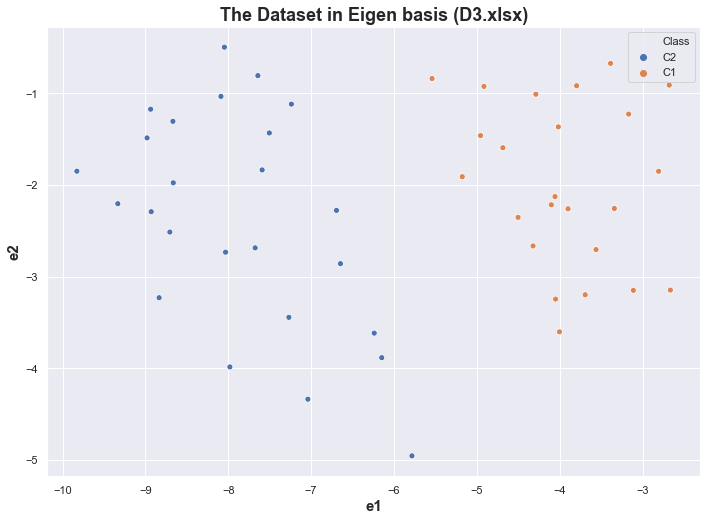

In [46]:
#visualize data in eigen basis
sns.set(rc={'figure.figsize':(11.7,8.27)})
b=sns.scatterplot(data=mod_dataset,x="e1",y="e2",hue="Class")
b.set_title("The Dataset in Eigen basis ("+name+".xlsx)",fontsize=18,fontweight="bold")
b.set_ylabel("e2",fontweight="bold",fontsize=15)
b.set_xlabel("e1",fontweight="bold",fontsize=15)